# 

# Introduction

This is information The Johns Hopkins University Hospital trying to do a prediction of the chances of one being Sepssis Positive or Negative

## Null Hypothesis:

There is no significant difference in the mean age between patients with positive and negative "Sepssis" conditions.

## Alternate Hypothesis:

There is a significant difference in the mean age between patients with positive and negative "Sepssis" conditions.

## Questions

1. Between Positive and Negative Sepssis which one has a higher numbers ? 
2. Is there a correlation between a Sepssis and Age Bracket ?
3. What is the Insurance uptake like for those with Positive Sepssis compared to Negative Sepssis ?
4. What is the effect of body weight on sepsis status?
5. How likely is patients with high blood pressure to get sepsis?

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

#Data Splitting
from sklearn.model_selection import train_test_split, GridSearchCV

#Models
from sklearn.metrics import confusion_matrix,classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy import stats

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
import pickle
#import shap

# EDA
#from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
# loading dataset
patient_test= pd.read_csv(r"C:\Users\PK\Documents\Embedding-a-Machine-Learning-Model-in-A-Web-Applications\Paitients_Files_Test.csv")
patient_train= pd.read_csv(r"C:\Users\PK\Documents\Embedding-a-Machine-Learning-Model-in-A-Web-Applications\Paitients_Files_Train.csv")

## Data Overview

In [3]:
patient_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


In [4]:
patient_train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [12]:
patient_train.shape

(599, 11)

In [6]:
patient_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [7]:
patient_train.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [8]:
patient_train.duplicated().sum()

0

In [9]:
patient_train.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Exploratory Data Analysis

### Between Positive and Negative Sepssis which one has a higher numbers ? 

In [10]:
# Getting the value count of Sepssis(positive/negative)
patient_train['Sepssis'].value_counts()

Negative    391
Positive    208
Name: Sepssis, dtype: int64

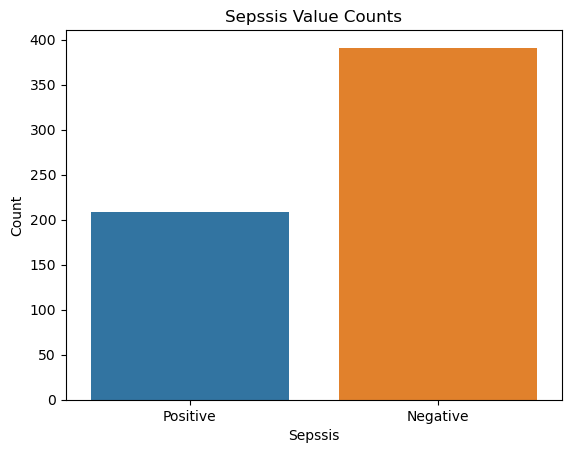

In [11]:
sns.countplot(x='Sepssis', data=patient_train)
plt.title('Sepssis Value Counts')
plt.xlabel('Sepssis')
plt.ylabel('Count')
plt.show()

From the above graph we are able to note that we have more Negative results as compared to Positive

### Is there a correlation between a Sepssis and Age Bracket ?

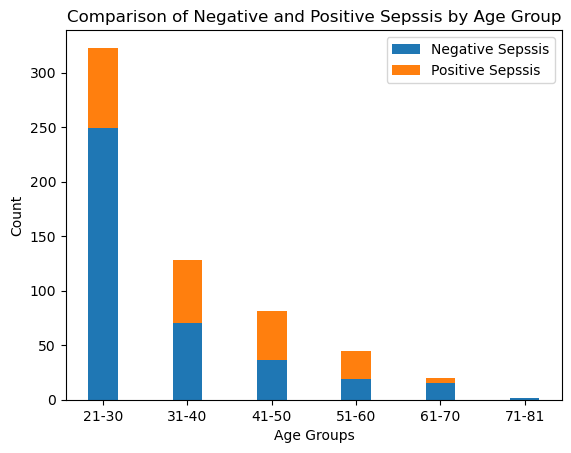

In [13]:
# Define age groups
age_groups = ["21-30", "31-40", "41-50", "51-60", "61-70","71-81"]

# Count occurrences of Sepssis for each age group
grouped_data = {age_group: {"Positive": 0, "Negative": 0} for age_group in age_groups}
for age, sepssis in zip(patient_train["Age"], patient_train["Sepssis"]):
    for age_range in age_groups:
        age_range_values = age_range.split("-")
        if int(age_range_values[0]) <= age <= int(age_range_values[1]):
            grouped_data[age_range][sepssis] += 1

# Get the counts of Negative and Positive Sepssis for each age group
negative_counts = [grouped_data[age_group]["Negative"] for age_group in age_groups]
positive_counts = [grouped_data[age_group]["Positive"] for age_group in age_groups]

# Create a bar plot to compare Negative and Positive Sepssis
bar_width = 0.35
index = range(len(age_groups))

plt.bar(index, negative_counts, bar_width, label='Negative Sepssis')
plt.bar(index, positive_counts, bar_width, bottom=negative_counts, label='Positive Sepssis')

# Set x-axis ticks and labels
plt.xlabel('Age Groups')
plt.xticks(index, age_groups)

# Set y-axis label
plt.ylabel('Count')

# Set title and legend
plt.title('Comparison of Negative and Positive Sepssis by Age Group')
plt.legend()

# Display the plot
plt.show()

We are able to conclude there is a higher percantage of positive and negative sepssis in the age bracket of 18-30 yrs

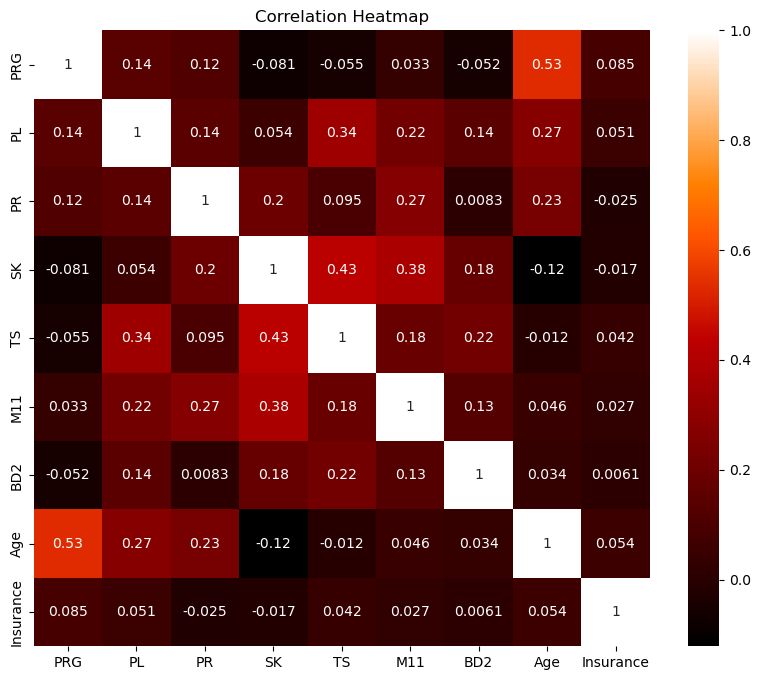

In [14]:
# Calculate the correlation matrix
corr_matrix = patient_train.drop(columns=['ID']).corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='gist_heat', square=True)

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

#### Based on the heatmap, we can make the following observations:
-> Age and PRG have a moderately positive correlation, indicating that as the number of pregnancies increases, the age tends to be higher.

-> PL and PR have a weak positive correlation, suggesting that higher glucose levels may be associated with slightly higher diastolic blood pressure.

-> M11 and Age have a weak negative correlation, implying that older individuals tend to have slightly lower values for M11.

-> TS and PRG have a weak negative correlation, indicating that as the number of pregnancies increases, the triceps skinfold thickness tends to be slightly lower.

-> There seems to be no significant correlation between other variables based on the given dataset.

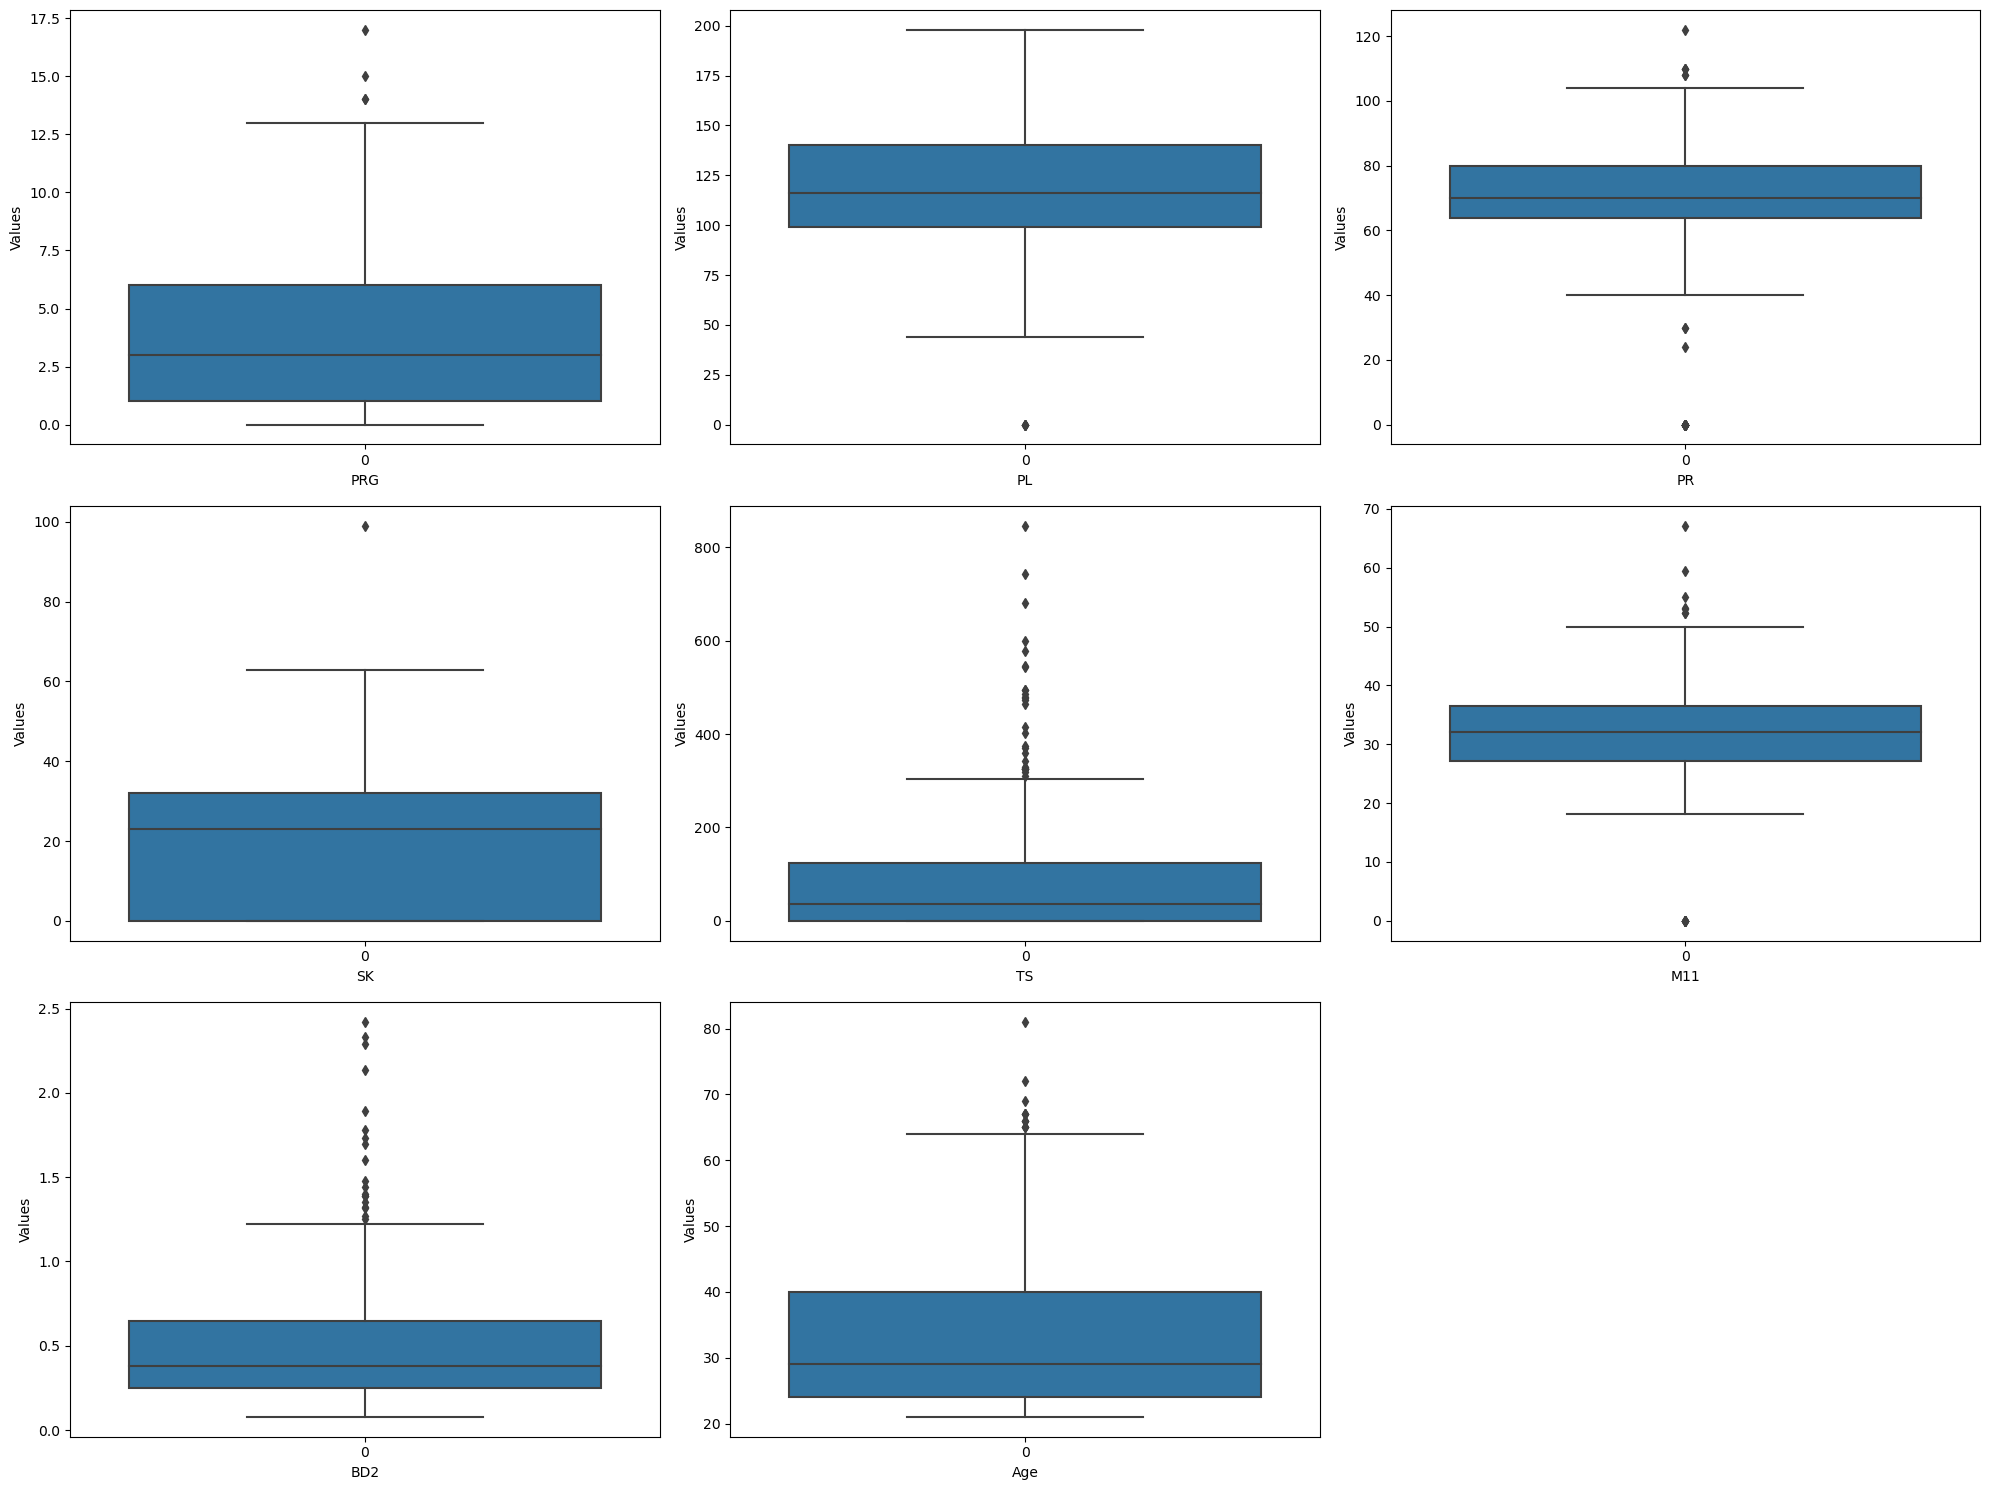

In [15]:
# Select the columns for individual box plots
columns_for_boxplot = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']

# Create individual box plots
plt.figure(figsize=(20, 15))

for i, col in enumerate(columns_for_boxplot):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=patient_train[col])
    plt.xlabel(col)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

We are able to note that there are outliners across

### What is the Insurance uptake like for those with Positive Sepssis compared to Negative Sepssis

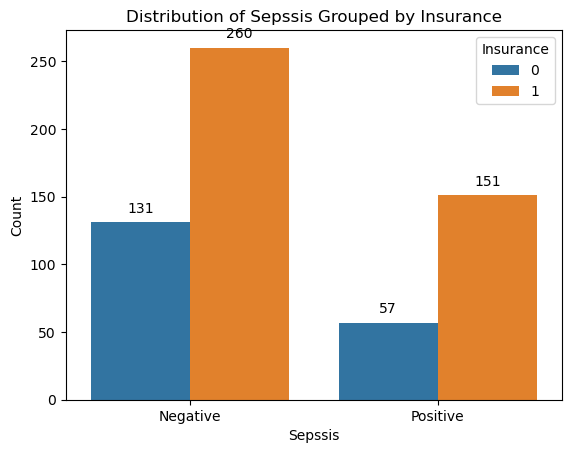

In [16]:
# Count the occurrences of each combination of Sepssis and Insurance
count_data = patient_train.groupby(['Sepssis', 'Insurance']).size().reset_index(name='Count')

# Create a bar plot
ax = sns.barplot(x='Sepssis', y='Count', hue='Insurance', data=count_data)

# Add value annotations to the plot
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Set labels and title
plt.xlabel('Sepssis')
plt.ylabel('Count')
plt.title('Distribution of Sepssis Grouped by Insurance')

# Display the plot
plt.show()

We can conclude that insurance uptake is lower for those with positive sepssis as compared to those who are negative

## Testing Null Hypothesis
### There is no significant difference in the mean age between patients with positive and negative "Sepssis" conditions.

In [17]:
# Separate the age values for positive and negative Sepssis groups
age_positive = patient_train[patient_train['Sepssis'] == 'Positive']['Age']
age_negative = patient_train[patient_train['Sepssis'] == 'Negative']['Age']

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(age_positive, age_negative)

# Define the significance level
alpha = 0.05

# Compare the p-value with the significance level to draw conclusions
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean age.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean age.")

Reject the null hypothesis. There is a significant difference in the mean age.


## Testing Alternate Hypothesis
### There is a significant difference in the mean age between patients with positive and negative "Sepssis" conditions.

In [18]:
# Separate the age values for patients with positive and negative Sepssis
positive_sepssis = patient_train[patient_train['Sepssis'] == 'Positive']['Age']
negative_sepssis = patient_train[patient_train['Sepssis'] == 'Negative']['Age']

# Perform an independent samples t-test
t_statistic, p_value = stats.ttest_ind(positive_sepssis, negative_sepssis)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 5.254202967191448
P-value: 2.0718778891881855e-07


We can interpret the results as follows:

T-Statistic: The t-statistic measures the difference between the mean ages of the positive and negative Sepssis groups relative to the variation within each group. In this case, the t-statistic is 5.254202967191447, indicating a significant difference between the mean ages of the two groups.

P-Value: The p-value represents the probability of obtaining the observed difference in means or a more extreme difference if the null hypothesis (no significant difference) were true. In this case, the p-value is very small (2.0718778891882012e-07), which is significantly lower than the conventional significance level of 0.05. Therefore, we reject the null hypothesis and conclude that there is a significant difference in the mean age between patients with positive and negative Sepssis conditions.

In summary, based on the results, we can say that there is strong evidence to support the claim that there is a significant difference in the mean age between patients with positive and negative Sepssis conditions.

## Feature Encoding

In [19]:
# spliting the data into feature and target variables
X = patient_train.iloc[:,:-1]
y = patient_train.iloc[:,-1]

In [20]:
# Encoding the target variable
label_encoder=LabelEncoder()
y_encoded = label_encoder.fit_transform(y) 

In [21]:
#converting to a DataFrame
y_encoded_df = pd.DataFrame(y_encoded, columns = ["Sepssis"])

In [22]:
# combining the features and the encoded target variables
patient_df = pd.concat([X, y_encoded_df], axis = 1 )

In [23]:
patient_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,1
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,0
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,1
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,0
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,1


In [24]:
patient_df.drop('ID',axis=1,inplace=True)

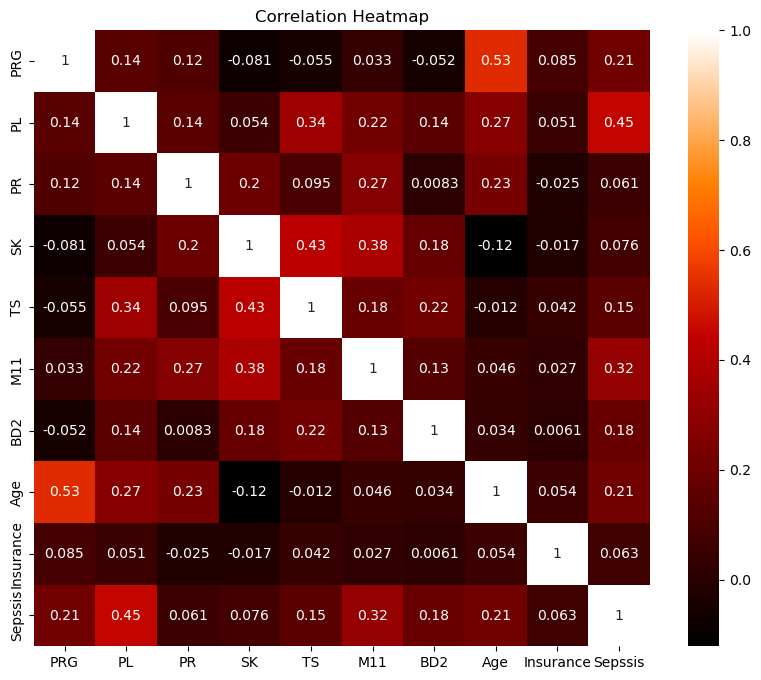

In [25]:
# Calculate the correlation matrix
corr_matrix = patient_df.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='gist_heat', square=True)

# Set the title of the heatmap
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

The above heatmap indicates that the top three features that determines whether or not a patient have Sepssis are the PL,M11 and the Age and PRG in the same rank. It is therefore understood that a patient's blood work results1 (PL),body mass index (M11), age and plasma glucose hilghly influence whether a patient have sepsis or not.

## Data Splitting

In [26]:
# Split the encoded data into train and test sets
X_train, X_eval, y_train, y_eval = train_test_split(patient_df.iloc[:, :-1], patient_df.iloc[:, -1:],
                                                    test_size=0.2, random_state=42, stratify=patient_df.iloc[:, -1:])

In [27]:
X_train.shape, X_eval.shape, y_train.shape, y_eval.shape

((479, 9), (120, 9), (479, 1), (120, 1))

<AxesSubplot:ylabel='None'>

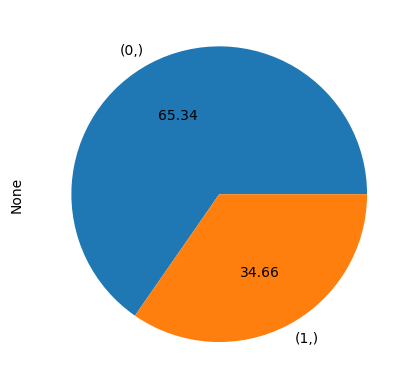

In [28]:
y_train.value_counts().plot.pie(autopct='%.2f')

The classes are imbalance hence we are going to use undersampling to balance the dataset, 
undersampling because we would like to use the actual data. Oversampling introduces artifical data.We would use both the imbalance and balance to build our model and compare the differences

In [29]:
rus =  RandomUnderSampler(sampling_strategy=1)
x_rus,y_rus = rus.fit_resample(X_train,y_train)

<AxesSubplot:ylabel='None'>

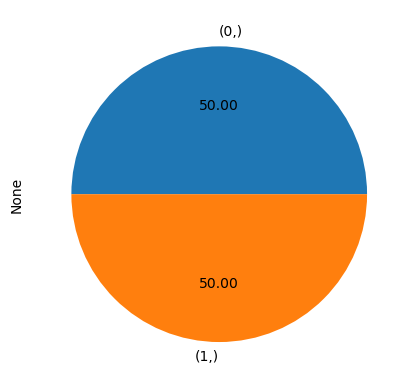

In [30]:
y_rus.value_counts().plot.pie(autopct='%.2f')

Now the data is balanced, let see how both dataset perform with the ML models

## Imputing Missing Values

In [31]:
# Creating imputer variables
numerical_imputer = SimpleImputer(strategy = "mean")

In [32]:
X_train_imputed = numerical_imputer.fit_transform(X_train)
x_rus_imputed = numerical_imputer.fit_transform(x_rus)

## Features Scaling

In [33]:
#Create a Scaler and fit it to your training data
scaler = StandardScaler()
scaler.fit(X_train_imputed)
scaler.fit(x_rus_imputed)

# Transform the data
scaled_df = scaler.transform(X_train_imputed)
scaled_rus_df = scaler.transform(x_rus_imputed)
# Create a new DataFrame with the original column names
X_train_df = pd.DataFrame(scaled_df, columns=['PRG','PL','PR','SK','TS','M11','BD2','Age','Insurance'])
x_rus_df = pd.DataFrame(scaled_rus_df, columns=['PRG','PL','PR','SK','TS','M11','BD2','Age','Insurance'])

In [34]:
X_train_df

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,0.816891,-0.649456,0.297647,1.194181,0.211102,0.608388,-0.838845,0.907990,0.675382
1,0.816891,1.671244,0.784920,0.034739,0.982252,0.442816,0.163507,1.414349,-1.480644
2,-0.610518,-1.266352,0.200193,-0.331400,-0.045948,-0.295889,0.061173,-0.779875,0.675382
3,-0.325037,1.641868,-0.189625,0.278832,-0.099130,0.200827,-0.663039,-0.695481,-1.480644
4,-1.181482,-1.178224,-0.189625,0.095762,-0.134585,0.430080,0.055925,-1.117447,0.675382
...,...,...,...,...,...,...,...,...,...
474,-1.181482,-1.119472,0.005284,0.705995,-0.719596,0.430080,-0.749630,-0.779875,0.675382
475,-0.039555,0.525582,0.882374,-1.246749,-0.719596,1.474456,0.318321,-1.033054,-1.480644
476,1.387854,-0.061937,-0.579443,-1.246749,-0.719596,0.111673,1.548957,-0.104729,0.675382
477,-0.039555,0.584334,-0.481989,0.461902,0.521335,-0.372306,-0.621056,0.232844,0.675382


In [35]:
x_rus_df

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,-0.896000,-0.796336,0.102738,1.194181,-0.719596,0.723015,-0.802109,-0.357909,0.675382
1,-1.181482,1.083725,-0.871807,-1.246749,-0.719596,-1.340265,-0.707647,2.595854,-1.480644
2,-0.325037,-1.207600,-0.481989,0.644971,-0.560048,0.239036,-0.492482,-0.779875,-1.480644
3,1.958818,0.408078,0.395102,-1.246749,-0.719596,0.098936,-0.272070,0.064057,-1.480644
4,-0.896000,-1.090096,0.005284,0.828041,-0.037084,0.659333,-0.321925,-0.864268,0.675382
...,...,...,...,...,...,...,...,...,...
327,-1.181482,-0.091313,-0.092171,0.583948,0.742930,0.239036,-0.841469,-0.104729,0.675382
328,0.245927,1.230605,0.395102,-1.246749,-0.719596,1.690973,-0.481986,-0.611088,0.675382
329,2.815263,1.494989,-0.287080,0.583948,-0.719596,0.149882,-0.817853,0.317237,0.675382
330,-0.039555,0.525582,0.882374,-1.246749,-0.719596,1.474456,0.318321,-1.033054,-1.480644


## Machine Learning Models

### Decision Tree Regression Model

In [36]:
#fitting decision tree model
dt1_model=DecisionTreeClassifier(random_state=42)

In [37]:
#fitting model on imbalanced data
dt1_model.fit(X_train_df,y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
X_test_imputed = numerical_imputer.transform(X_eval)
X_test_scaled = scaler.transform(X_test_imputed)
X_test_df = pd.DataFrame(X_test_scaled, columns=['PRG','PL','PR','SK','TS','M11','BD2','Age','Insurance'])

In [39]:
dt1_pred = dt1_model.predict(X_test_df)

In [40]:
# report on unbalanced data
dt_report1 = classification_report(y_eval, dt1_pred)
print(dt_report1)

              precision    recall  f1-score   support

           0       0.78      0.79      0.79        78
           1       0.61      0.60      0.60        42

    accuracy                           0.73       120
   macro avg       0.70      0.70      0.70       120
weighted avg       0.72      0.72      0.72       120



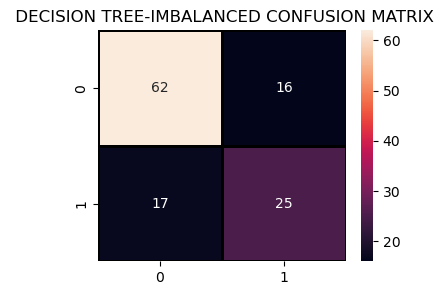

In [41]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_eval, dt1_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=2)
    
plt.title(" DECISION TREE-IMBALANCED CONFUSION MATRIX")
plt.show()

In [42]:
#fitting model on balanced data
dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(x_rus_df,y_rus)

DecisionTreeClassifier(random_state=42)

In [43]:
dt_pred = dt_model.predict(X_test_df)

In [44]:
# report on balanced data
dt_report2 = classification_report(y_eval, dt_pred)
print(dt_report2)

              precision    recall  f1-score   support

           0       0.77      0.62      0.69        78
           1       0.48      0.67      0.56        42

    accuracy                           0.63       120
   macro avg       0.63      0.64      0.62       120
weighted avg       0.67      0.63      0.64       120



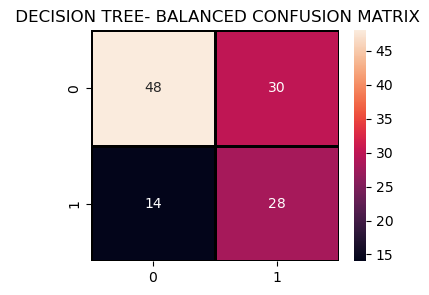

In [45]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_eval, dt_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=2)
    
plt.title(" DECISION TREE- BALANCED CONFUSION MATRIX")
plt.show()

with the decision tree model, it is observed that the accuracy of the imbalanced data is higher than the balanced data

### Random Forest

In [46]:
#fitting random forest model
rf_model = RandomForestClassifier(random_state=50)

In [47]:
#fitting model on imbalanced data
rf_model.fit(X_train_df,y_train)

RandomForestClassifier(random_state=50)

In [48]:
X_test_imputed = numerical_imputer.transform(X_eval)
X_test_scaled = scaler.transform(X_test_imputed)
X_test_df = pd.DataFrame(X_test_scaled, columns=['PRG','PL','PR','SK','TS','M11','BD2','Age','Insurance'])

In [49]:
rf_pred = rf_model.predict(X_test_df)

In [50]:
# report on unbalanced data
rf_report1 = classification_report(y_eval, rf_pred)
print(rf_report1)

              precision    recall  f1-score   support

           0       0.78      0.79      0.79        78
           1       0.61      0.60      0.60        42

    accuracy                           0.73       120
   macro avg       0.70      0.70      0.70       120
weighted avg       0.72      0.72      0.72       120



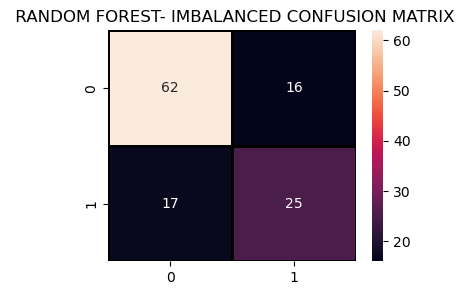

In [51]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_eval, rf_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=2)
    
plt.title(" RANDOM FOREST- IMBALANCED CONFUSION MATRIX")
plt.show()

In [52]:
rf_rus_model = rf_model.fit(x_rus_df,y_rus)
rf_rus_pred = rf_rus_model.predict(X_test_df)
rf_rus_report = classification_report(y_eval, rf_rus_pred )
print(rf_rus_report)

              precision    recall  f1-score   support

           0       0.85      0.71      0.77        78
           1       0.58      0.76      0.66        42

    accuracy                           0.73       120
   macro avg       0.71      0.73      0.71       120
weighted avg       0.75      0.72      0.73       120



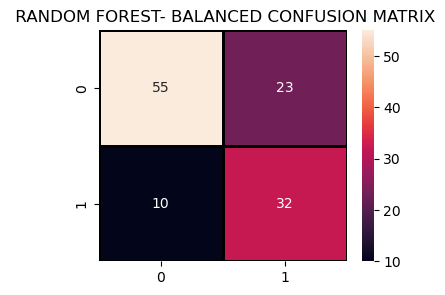

In [53]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_eval, rf_rus_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=2)
    
plt.title(" RANDOM FOREST- BALANCED CONFUSION MATRIX")
plt.show()

### Logistic Regression

In [54]:
# Fit a logistic regression model to the training data
lr_model = LogisticRegression(random_state=45)

In [55]:
#fitting model on imbalanced data
lr_model.fit(X_train_df,y_train)

LogisticRegression(random_state=45)

In [56]:
lr_pred = lr_model.predict(X_test_df)

In [57]:
# report on unbalanced data
lr_report1 = classification_report(y_eval, lr_pred)
print(lr_report1)

              precision    recall  f1-score   support

           0       0.80      0.81      0.80        78
           1       0.63      0.62      0.63        42

    accuracy                           0.74       120
   macro avg       0.72      0.71      0.71       120
weighted avg       0.74      0.74      0.74       120



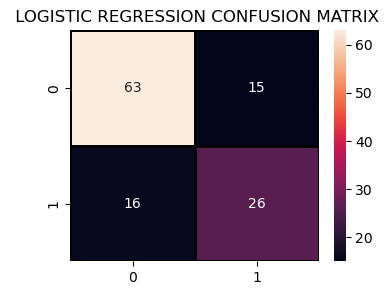

In [58]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_eval, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=2)
    
plt.title(" LOGISTIC REGRESSION CONFUSION MATRIX")
plt.show()

### K Nearest Neighbour

In [59]:
kn_model = KNeighborsClassifier(n_neighbors=5)

In [60]:
#fitting model on imbalanced data
kn_model.fit(X_train_df,y_train)

KNeighborsClassifier()

In [61]:
kn_pred = kn_model.predict(X_test_df)

In [62]:
# report on unbalanced data
kn_report1 = classification_report(y_eval, kn_pred)
print(kn_report1)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        78
           1       0.62      0.60      0.61        42

    accuracy                           0.73       120
   macro avg       0.71      0.70      0.70       120
weighted avg       0.73      0.73      0.73       120



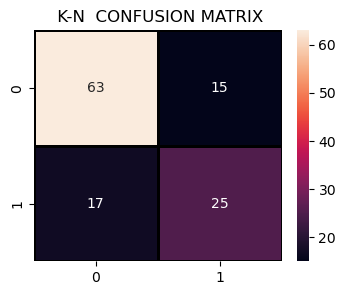

In [63]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_eval, kn_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=2)
    
plt.title(" K-N  CONFUSION MATRIX")
plt.show()

## Model Comparison

In [64]:
dt_f1= f1_score(y_eval, dt1_pred)
rf_f1= f1_score(y_eval, rf_pred)
kn_f1= f1_score(y_eval, kn_pred)
lr_f1= f1_score(y_eval, lr_pred)
dt_rus_f1= f1_score(y_eval, dt1_pred)
rf_rus_f1= f1_score(y_eval, rf_rus_pred)

In [65]:
results= {'model':['DecisionTreeClassifierImbalanced','RandomForestClassifier','KNN','LogisticRegression','DecisionTreeClassifierbalanced','RandomForestClassifierbalanced'],
         'f1_score':[dt_f1,rf_f1,kn_f1,lr_f1,dt_rus_f1,rf_rus_f1]}
results_df= pd.DataFrame(results)

In [66]:
results_df

,model,f1_score
0,DecisionTreeClassifierImbalanced,0.602410
1,RandomForestClassifier,0.602410
2,KNN,0.609756
3,LogisticRegression,0.626506
4,DecisionTreeClassifierbalanced,0.602410
5,RandomForestClassifierbalanced,0.659794



### Observation and Conclusions
The results show that the models with the top 3 F1 scores are RandomForestClassifierBalanced,LogisticRegression and KNN. Also from the confusion matrix LogisticRegression model has the highest number of accurate predictions. It made 89 predictions accurately out of 120 data entries in the evaluation dataset follwed by the RandomForest classifier on the balanced dataset which made 86 accurate predictions.

Comparing the confusion matrix of the Ligistic regression model and the radomforest model built on the balanced dataset. it is observed that the

The F1 score is a measure of the accuracy of a model. It is calculated by taking the harmonic mean of the precision and recall scores. Precision is the percentage of predicted positive instances that are actually positive, and recall is the percentage of actual positive instances that are predicted positive.

The KNN and LogisticRegression model is the best models based on observation.

## Hyperparameter Tuning

In [69]:
# Define the parameter grid for the decision tree classifier
rf_param = {
      'bootstrap': [True],
      'max_depth': [80, 90, 100, 110],
      'max_features': [2, 3],
      'min_samples_leaf': [3, 4, 5],
      'min_samples_split': [8, 10, 12],
      'n_estimators': [100, 200, 300, 1000]
}


# perform a grid search with 5-fold cross-validation using only the selected features
rf_grid_search = GridSearchCV(estimator=rf_rus_model, param_grid=rf_param,verbose=3,scoring='f1',cv=5)
rf_grid_search.fit(x_rus_df,y_rus)

# print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters: ", rf_grid_search.best_params_)
print('Best estimators: ',rf_grid_search.best_estimator_)
print("Best f1_score: ", rf_grid_search.best_score_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.806 total time=   2.4s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.685 total time=   1.6s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.794 total time=   1.7s
[CV 4/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.758 total time=   1.6s
[CV 5/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.806 total time=   1.9s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.783 total time=   3.1s
[CV 2/5] END bootstrap=True, max_dep

[CV 5/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300;, score=0.789 total time=   5.7s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000;, score=0.812 total time=  19.9s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000;, score=0.685 total time=  19.7s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000;, score=0.781 total time=  20.3s
[CV 4/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000;, score=0.746 total time=  21.9s
[CV 5/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000;, score=0.789 total time=  19.8s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_sample

[CV 5/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.789 total time=   3.9s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300;, score=0.800 total time=   6.0s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300;, score=0.694 total time=   6.0s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300;, score=0.742 total time=   6.4s
[CV 4/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300;, score=0.746 total time=   5.7s
[CV 5/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=300;, score=0.789 total time=   6.1s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_spl

[CV 5/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.789 total time=   2.2s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.800 total time=   4.3s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.685 total time=   3.8s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.762 total time=   3.7s
[CV 4/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.765 total time=   3.9s
[CV 5/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.789 total time=   4.4s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_spl

[CV 5/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000;, score=0.789 total time=  23.0s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.788 total time=   2.0s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.732 total time=   2.0s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.750 total time=   1.9s
[CV 4/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.746 total time=   2.6s
[CV 5/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.778 total time=   2.9s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_sp

[CV 5/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=0.789 total time=   6.8s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000;, score=0.812 total time=  21.4s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000;, score=0.712 total time=  21.0s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000;, score=0.730 total time=  20.4s
[CV 4/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000;, score=0.746 total time=  21.0s
[CV 5/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000;, score=0.789 total time=  20.7s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_sample

[CV 5/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.771 total time=   4.1s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.794 total time=   6.5s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.730 total time=   5.4s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.710 total time=   6.6s
[CV 4/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.727 total time=   5.3s
[CV 5/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.771 total time=   5.9s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_spl

[CV 5/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.778 total time=   2.2s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.794 total time=   3.7s
[CV 2/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.712 total time=   3.6s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.762 total time=   4.1s
[CV 4/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.758 total time=   3.9s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.789 total time=   4.2s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_spl

[CV 5/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000;, score=0.789 total time=  21.1s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.794 total time=   2.0s
[CV 2/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.694 total time=   2.1s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.781 total time=   1.9s
[CV 4/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.758 total time=   1.6s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.778 total time=   2.0s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_spl

[CV 5/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300;, score=0.778 total time=   6.2s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000;, score=0.812 total time=  18.8s
[CV 2/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000;, score=0.685 total time=  19.0s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000;, score=0.762 total time=  24.0s
[CV 4/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000;, score=0.727 total time=  21.0s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000;, score=0.789 total time=  18.7s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_spli

[CV 5/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.795 total time=   3.6s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300;, score=0.812 total time=   5.8s
[CV 2/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300;, score=0.712 total time=   5.6s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300;, score=0.730 total time=   5.6s
[CV 4/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300;, score=0.735 total time=   6.8s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300;, score=0.795 total time=   5.6s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, 

[CV 5/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.806 total time=   1.9s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.812 total time=   4.1s
[CV 2/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.703 total time=   3.7s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.710 total time=   4.0s
[CV 4/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.716 total time=   4.2s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.789 total time=   3.7s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=8, 

[CV 5/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000;, score=0.789 total time=  24.3s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.794 total time=   2.1s
[CV 2/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.712 total time=   2.6s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.730 total time=   2.4s
[CV 4/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.738 total time=   2.2s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.789 total time=   2.3s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8

[CV 5/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300;, score=0.789 total time=   6.2s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000;, score=0.812 total time=  20.3s
[CV 2/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000;, score=0.712 total time=  18.7s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000;, score=0.730 total time=  19.0s
[CV 4/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000;, score=0.746 total time=  26.6s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000;, score=0.789 total time=  20.2s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_sampl

[CV 4/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200;, score=0.746 total time=   4.3s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200;, score=0.789 total time=   3.5s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300;, score=0.800 total time=   6.4s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300;, score=0.685 total time=   6.3s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300;, score=0.754 total time=   5.8s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300;, score=0.746 total time=   6.2s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samp

[CV 3/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100;, score=0.762 total time=   3.7s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100;, score=0.746 total time=   3.0s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100;, score=0.778 total time=   2.3s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.800 total time=   5.0s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.712 total time=   4.7s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.762 total time=   4.4s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samp

[CV 2/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000;, score=0.685 total time=  23.4s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000;, score=0.762 total time=  24.6s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000;, score=0.727 total time=  21.1s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000;, score=0.789 total time=  22.2s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.794 total time=   2.5s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.712 total time=   1.9s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_

[CV 1/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=0.812 total time=  13.6s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=0.704 total time=  14.2s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=0.710 total time=  15.1s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=0.735 total time=  13.6s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300;, score=0.789 total time=  14.4s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000;, score=0.824 total time=  49.2s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_sam

[CV 5/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.789 total time=   4.1s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.812 total time=   9.5s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.712 total time=   8.2s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.689 total time=   9.1s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.716 total time=   6.2s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.789 total time=   6.5s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samp

[CV 4/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000;, score=0.727 total time=  40.6s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=1000;, score=0.789 total time=  41.9s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.794 total time=   4.0s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.712 total time=   4.1s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.730 total time=   4.2s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.738 total time=   3.7s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samp

[CV 3/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300;, score=0.742 total time=   9.0s
[CV 4/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300;, score=0.765 total time=   9.6s
[CV 5/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300;, score=0.789 total time=   8.8s
[CV 1/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000;, score=0.812 total time=  30.8s
[CV 2/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000;, score=0.685 total time=  30.7s
[CV 3/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000;, score=0.769 total time=  30.0s
[CV 4/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples

[CV 2/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.712 total time=   5.6s
[CV 3/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.750 total time=   5.0s
[CV 4/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.765 total time=   6.8s
[CV 5/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.789 total time=   5.4s
[CV 1/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300;, score=0.824 total time=   7.7s
[CV 2/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300;, score=0.685 total time=   6.9s
[CV 3/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_sp

[CV 1/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.765 total time=   1.8s
[CV 2/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.712 total time=   2.0s
[CV 3/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.794 total time=   2.0s
[CV 4/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.746 total time=   2.4s
[CV 5/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.778 total time=   3.4s
[CV 1/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200;, score=0.783 total time=   5.3s
[CV 2/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_sp

[CV 5/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300;, score=0.789 total time=   6.8s
[CV 1/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000;, score=0.789 total time=  21.9s
[CV 2/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000;, score=0.685 total time=  24.8s
[CV 3/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000;, score=0.762 total time=  22.2s
[CV 4/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000;, score=0.746 total time=  22.7s
[CV 5/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000;, score=0.789 total time=  28.7s
[CV 1/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min

[CV 4/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200;, score=0.735 total time=   4.5s
[CV 5/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200;, score=0.778 total time=   5.0s
[CV 1/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300;, score=0.806 total time=   8.2s
[CV 2/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300;, score=0.704 total time=   7.8s
[CV 3/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300;, score=0.730 total time=   6.8s
[CV 4/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300;, score=0.746 total time=   7.7s
[CV 5/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samp

[CV 3/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100;, score=0.742 total time=   1.5s
[CV 4/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100;, score=0.677 total time=   2.0s
[CV 5/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100;, score=0.789 total time=   2.0s
[CV 1/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.794 total time=   4.2s
[CV 2/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.730 total time=   4.4s
[CV 3/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200;, score=0.721 total time=   3.7s
[CV 4/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samp

[CV 2/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000;, score=0.730 total time=  37.3s
[CV 3/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000;, score=0.730 total time=  35.7s
[CV 4/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000;, score=0.727 total time=  37.1s
[CV 5/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000;, score=0.789 total time=  34.6s
[CV 1/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.788 total time=   3.3s
[CV 2/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.732 total time=   3.0s
[CV 3/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_

In [67]:
# define the hyperparameter grid to search over the logistics regression model
lr_param = {
    'C': [200,300,400,500],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# perform a grid search with 5-fold cross-validation using only the selected features
lr_grid_search = GridSearchCV(estimator=lr_model, param_grid=lr_param,scoring='f1',cv=5)
lr_grid_search.fit(X_train_df, y_train)

# print the best hyperparameters and the corresponding mean cross-validation score
print("Best hyperparameters: ", lr_grid_search.best_params_)
print('Best estimators: ',lr_grid_search.best_estimator_)
print("Best f1_score average: ", lr_grid_search.best_score_)

Best hyperparameters:  {'C': 200, 'solver': 'newton-cg'}
Best estimators:  LogisticRegression(C=200, random_state=45, solver='newton-cg')
Best f1_score average:  0.6482967000682495


In [68]:
# define the parameter grid for knn model
kn_param = {'n_neighbors': [20,25,30,35,40],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}
# perform grid search with cross-validation
kn_grid_search = GridSearchCV(kn_model, param_grid=kn_param,scoring='f1', cv=5)
kn_grid_search.fit(X_train_df, y_train)

# print the best hyperparameters and the corresponding score
print("Best hyperparameters: ",kn_grid_search.best_params_)
print('Best estimators: ',kn_grid_search.best_estimator_)
print("Best score: ", kn_grid_search.best_score_)

Best hyperparameters:  {'n_neighbors': 20, 'p': 2, 'weights': 'distance'}
Best estimators:  KNeighborsClassifier(n_neighbors=20, weights='distance')
Best score:  0.5651256180002017


Based on the F1 scores, the RandomForestClassifier model achieved the highest F1 score of  0.771, followed by the Logistic regression with a score of 0.648, and KNN with a score of 0.565.

Therefore, if the F1 score is the primary evaluation metric, the RandomForestClassifier model with the chosen hyperparameters may be considered the best model among the three. 

## Export Key Components
Here is the section to export the important ML objects that will be use to develop an app: Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc.

In [70]:
# Get the best LR model
best_lr = lr_grid_search.best_estimator_
best_rf = rf_grid_search.best_estimator_

In [71]:
components_dtc = {
    "num_imputer":numerical_imputer,
    "scaler": scaler,
    "models": best_lr 
}

In [72]:
components_rfm = {
    "num_imputer":numerical_imputer,
    "scaler": scaler,
    "models": best_rf 
}

In [73]:
# Export the LR model
with open('lr_model.pkl', 'wb') as f:
    pickle.dump(components_dtc, f)

In [74]:
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(components_rfm, f)